In [ ]:
# 🔹 1. IMPORTAÇÃO DE BIBLIOTECAS

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Estilo visual
sns.set(style='whitegrid')

In [ ]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [ ]:
# Leitura do arquivo JSON
df = pd.read_json(url)

In [ ]:
# Visualização inicial
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
#3. TRATAMENTO E ENGENHARIA DE VARIÁVEIS

# Flatten das colunas aninhadas
df = pd.json_normalize(df.to_dict(orient='records'))


In [ ]:
# Conversão de colunas numéricas

df['account.Charges.Monthly'] = pd.to_numeric(df['account.Charges.Monthly'], errors='coerce')
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['customer.tenure'] = pd.to_numeric(df['customer.tenure'], errors='coerce')

In [ ]:
# Criar variável de faturamento diário (evitando divisão por zero)

df['DailyCharge'] = df['account.Charges.Monthly'] / df['customer.tenure'].replace(0, 1)

In [ ]:
# Criar variável numérica para churn
df['ChurnNumeric'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
# Contar número de serviços contratados (respostas "Yes")
service_col = [
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies',
    'phone.MultipleLines'
]

df['TotalServices'] = df[service_col].apply(lambda row: sum(val == 'Yes' for val in row), axis=1 )

In [ ]:
# Verificar estrutura final
df[['account.Charges.Monthly', 'account.Charges.Total', 'DailyCharge', 'ChurnNumeric', 'TotalServices']].describe()

,account.Charges.Monthly,account.Charges.Total,DailyCharge,ChurnNumeric,TotalServices
count,7267.000000,7256.000000,7267.000000,7043.000000,7267.000000
mean,64.720098,2280.634213,8.668935,0.265370,2.456034
std,30.129572,2268.632997,16.383211,0.441561,2.046618
min,18.250000,18.800000,0.268056,0.000000,0.000000
25%,35.425000,400.225000,1.277778,0.000000,1.000000
50%,70.300000,1391.000000,2.153947,0.000000,2.000000
75%,89.875000,3785.300000,6.682576,1.000000,4.000000
max,118.750000,8684.800000,102.450000,1.000000,7.000000


 4. ANÁLISE EXPLORATÓRIA DE DADOS (EDA) \\
 Distribuição de Evasão

/tmp/ipython-input-972707172.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


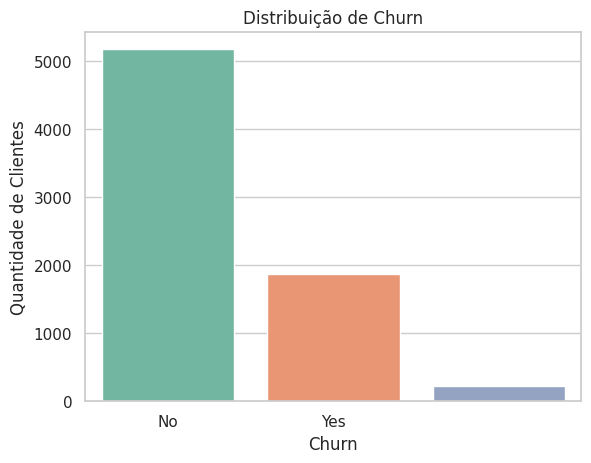

In [ ]:
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Distribuição de Churn')
plt.xlabel('Churn')
plt.ylabel('Quantidade de Clientes')
plt.show()

Relatório Final – Análise de Evasão de Clientes (Churn)


Introdução
A análise de Churn tem como objetivo compreender os motivos que levam clientes a cancelarem os serviços de uma empresa de telecomunicações. Ao estudar os dados históricos de clientes que permaneceram ou deixaram o serviço, podemos identificar padrões de comportamento e características comuns que indicam risco de evasão. Isso é essencial para desenvolver estratégias eficazes de retenção de clientes e aumentar a rentabilidade do negócio.

Limpeza e Tratamento de Dados
O conjunto de dados foi importado de um arquivo JSON estruturado e passou pelas seguintes etapas de preparação:

Normalização de colunas aninhadas, como customer, internet e phone, com pd.json_normalize.

Conversão de colunas financeiras (Charges.Monthly, Charges.Total) e de tempo (tenure) para tipo numérico.

Análise Exploratória de Dados (EDA)
Diversas análises e visualizações foram realizadas para entender os fatores mais relacionados ao churn:

1. Distribuição de Churn
Gráfico de barras mostra que a proporção de clientes que não cancelaram é maior que os que cancelaram, mas a evasão ainda é significativa.

2. Faturamento Mensal
Análise de densidade mostra que clientes com faturamento mais baixo tendem a ter maior taxa de churn.

Clientes com faturamento entre R$ 20 e R$ 40 concentram maior evasão.

3. Faturamento Diário
Boxplot indica que o faturamento diário médio de clientes que cancelaram é geralmente menor do que os que permaneceram.

4. Quantidade de Serviços Contratados
Clientes com menos serviços contratados têm maior propensão ao churn.

Aqueles que contratam 4 ou mais serviços tendem a permanecer mais tempo.

5. Matriz de Correlação
Correlação negativa entre:

TotalServices e ChurnNumeric (quanto mais serviços, menor o churn).

Charges.Total e ChurnNumeric (clientes mais antigos, com maior faturamento acumulado, tendem a não cancelar).


Conclusões e Insights
Clientes com faturamento baixo e poucos serviços contratados são os mais propensos a cancelar.

A retenção está associada a maior engajamento com os serviços e maior valor gerado para a empresa.

O tempo de permanência (tenure) e o total de cobrança são bons indicadores de fidelidade.


Recomendações
Oferecer pacotes com múltiplos serviços com preços promocionais para incentivar a adesão a mais produtos.

Criar alertas automáticos para clientes com baixo faturamento e poucos serviços, sinalizando risco de churn.

Implementar campanhas de retenção personalizadas, com benefícios para quem está nos perfis de maior risco.

Monitorar o faturamento diário e o total de serviços como indicadores de engajamento contínuo.

Investir em programas de fidelidade e bonificação por tempo de permanência.